# Simple puzzle

In this exercise, we will create a State class to represent the state of the simple puzzle presented in the lecture.

1. The class will have the ability to preserve the state of the puzzle
2. The class will include a method for comparing states
3. The class will implement an expand method that will generate a new state based on an input action

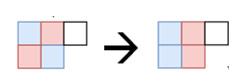

The library allows copying of complex structures

In [ ]:
import copy

In [ ]:
class State:
    """ Puzzle state
    
    gameplan - two-dimensional array
             - 0 - blue
             - 1 - red
             - 2 - space
    row      - row position of the space, for faster searching
    column -  column position of the space
    """

    # Generated will contain the number of instances created 
    generated = 0
    
    def __init__(self, gameplan, row, column):
        # Class constructor
        # check if the position of the space is correctly entered        
        assert (gameplan[row][column] == 0)
                
        # assignining variables with input parameters
        self.gameplan = []
        self.gameplan = gameplan
        self.row = row
        self.column = column

        State.generated += 1
        
    def __eq__(self, other):
        # comparison operator overload, only the gameplan needs to be compared
        return self.gameplan == other.gameplan        
        
    def expand(self, action):
        """ The method returns the new state of the puzzle according to the specified action
        
            If the action is invalid for the puzzle state, None is returned

            action - move l, r, u, d
        """
        
        if action == 'l':
            # check if the movement is valid
            if self.column > 0:
                # depth copy of the puzzle state
                new_gameplan = copy.deepcopy(self.gameplan)

                # stone replacement in new condition
                new_gameplan[self.row][self.column] = new_gameplan[self.row][self.column - 1]                
                new_gameplan[self.row][self.column - 1] = 0

                # create new object State
                return State(new_gameplan, self.row, self.column - 1)
        if action == 'r':
            if (self.row == 0 and self.column < 2) or (self.row == 1 and self.column < 1):
                new_gameplan = copy.deepcopy(self.gameplan)
                new_gameplan[self.row][self.column] = new_gameplan[self.row][self.column + 1]
                new_gameplan[self.row][self.column + 1] = 0
                return State(new_gameplan, self.row, self.column + 1)
        if action == 'u':
            if self.row > 0 and self.column < 2:
                new_gameplan = copy.deepcopy(self.gameplan)
                new_gameplan[self.row][self.column] = new_gameplan[self.row - 1][self.column]
                new_gameplan[self.row - 1][self.column] = 0
                return State(new_gameplan, self.row - 1, self.column)
        if action == 'd':
            if self.row < 1 and self.column < 2:
                new_gameplan = copy.deepcopy(self.gameplan)
                new_gameplan[self.row][self.column] = new_gameplan[self.row + 1][self.column]
                new_gameplan[self.row + 1][self.column] = 0
                return State(new_gameplan, self.row + 1, self.column)
        else:
            return None

List of possible actions

In [ ]:
actions=['l', 'r', 'u', 'd']

Creating an initial state

In [ ]:
state1 = State(gameplan=[[1, 0, 2], [2, 1]], row=0, column=1)

Tests whether state changes are implemented correctly.

The assert function is used to raise an exception when the method returns a different result than expected.

In [ ]:
# Action check left
state_left = state1.expand('l')
assert (state_left.gameplan == [[0, 1, 2], [2, 1]])
print (state_left.gameplan)

In [ ]:
# Action check right
state_right = state1.expand('r')
assert (state_right.gameplan == [[1, 2, 0], [2, 1]])
print (state_right.gameplan)

In [ ]:
# Action check down
state_down = state1.expand('d')
assert (state_down.gameplan == [[1, 1, 2], [2, 0]])
print (state_down.gameplan)

In [ ]:
# Action check up, not allowed
state_up = state1.expand('u')
assert (state_up is None)

Display the number of generated states

In [ ]:
print (state1.generated)